<a href="https://colab.research.google.com/github/samlegus/FastAI/blob/main/FastAI_Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.3 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path


<div><progress max="3214948" value="3219456"></progress> 100.14% [3219456/3214948 00:02&lt;00:00]</div>

In [ ]:
path.ls() #ls returns an L, special FastAI list

[Path('train'), Path('labels.csv'), Path('valid')]

In [ ]:
(path/'train').ls()

[Path('train/3'), Path('train/7')]

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes #should have outputted list contents

(#6131) [Path('train/3/10.png'), Path('train/3/10000.png'), Path('train/3/10011.png'), Path('train/3/10031.png'), Path('train/3/10034.png'), Path('train/3/10042.png'), Path('train/3/10052.png'), Path('train/3/1007.png'), Path('train/3/10074.png'), Path('train/3/10091.png'), Path('train/3/10093.png'), Path('train/3/10097.png'), Path('train/3/10099.png'), Path('train/3/10116.png'), Path('train/3/10125.png'), Path('train/3/10137.png'), Path('train/3/10141.png'), Path('train/3/10144.png'), Path('train/3/10155.png'), Path('train/3/10161.png'), Path('train/3/10206.png'), Path('train/3/1021.png'), Path('train/3/10210.png'), Path('train/3/10214.png'), Path('train/3/10238.png'), Path('train/3/10260.png'), Path('train/3/10278.png'), Path('train/3/10282.png'), Path('train/3/10314.png'), Path('train/3/10322.png'), Path('train/3/10328.png'), Path('train/3/10329.png'), Path('train/3/10330.png'), Path('train/3/10349.png'), Path('train/3/1035.png'), Path('train/3/10360.png'), Path('train/3/10369.png')

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path) #from actual python library PIL
im3

In [ ]:
array(im3)[4:10,4:10] # indexes 4 - 10 for rows, same for columns, thus 6 x 6 grid returned

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [ ]:
tensor(im3)[4:10,4:10] #i dont see a difference?

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [ ]:
#pandas data frame for color coded output
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [ ]:
#^okay so this is a visual representation of the array of the pixels representing the top chunk of the '3' cool

seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)



(6131, 6265)

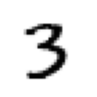

In [ ]:
show_image(three_tensors[1]);

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape
#Vector == 1d vector

torch.Size([6131, 28, 28])

In [ ]:
len(stacked_threes.shape)

3

In [ ]:
stacked_threes.ndim

3

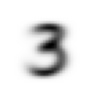

In [ ]:
#rank = number of axes/dimensions in a tensor
#shape = size of each axis of a tensor
#vector = 1d tensor
#vector v
#v.ndim in pytorch (tensor) = 1!!! NOT 3! a vector is a 1d tensor
#when confused translate all statements into terms of rank axis and length which are unambiguous terms

#...anyway
#ideal 3, the "mean" of all 3s, as in the average value of all 3's pixel values plotted as a single image
mean3 = stacked_threes.mean(0)
show_image(mean3);

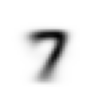

In [ ]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

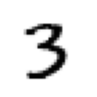

In [ ]:
a_3 = stacked_threes[1]
show_image(a_3);